# Setup

In [66]:
# import your standard packages
%run pkgs.py

# import your local functions
sys.path.insert(1, '../')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


# Paths and Parameters

In [67]:
bounds_wAS = [46,66,13,26]
bounds_AS = [66,79,3,26]
bounds_wBoB = [79,87,2,21]
bounds_BoB = [87,100,0,23]

## Read Data

In [68]:
# SLA
ds_SLA = xr.open_dataset('../data/sla_to_woa.nc')
ds_SLA


<xarray.Dataset>
Dimensions:           (lat: 35, lon: 55, month: 12, time: 329)
Coordinates:
  * time              (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-05-01
  * lon               (lon) float32 48.5 49.5 50.5 51.5 ... 100.5 101.5 102.5
  * lat               (lat) float32 -1.5 -0.5 0.5 1.5 ... 29.5 30.5 31.5 32.5
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mon_sla_mon_anom  (time, lat, lon) float64 ...
    mon_sla_mon_clim  (month, lat, lon) float64 ...

In [69]:
# SLA
ds_SLA_ia = xr.open_dataset('../data/sla_to_wod.nc')
ds_SLA_ia

<xarray.Dataset>
Dimensions:    (time: 341437)
Coordinates:
  * time       (time) datetime64[ns] 1770-01-01 1770-01-01 ... 2020-05-31
Data variables:
    daily_sla  (time) float64 ...
    lon        (time) float64 ...
    lat        (time) float64 ...

In [70]:
# WOD
ds_WOD = xr.open_dataset('../data/wod_processed.nc')
ds_WOD


<xarray.Dataset>
Dimensions:                      (coastal_loc: 341437, coastal_pos: 139423, lonmin,lonmax,latmin,latmax: 4, pres: 57, time: 341437)
Coordinates:
  * time                         (time) datetime64[ns] 1770-01-01 ... 2020-05-31
  * pres                         (pres) int64 0 5 10 15 ... 1350 1400 1450 1500
  * coastal_loc                  (coastal_loc) int64 0 1 2 ... 341435 341436
  * coastal_pos                  (coastal_pos) int64 0 1 2 ... 139421 139422
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    temp                         (time, pres) float64 ...
    sal                          (time, pres) float64 ...
    doxy                         (time, pres) float64 ...
    nitrate                      (time, pres) float64 ...
    phosphate                    (time, pres) float64 ...
    lat                          (time) float32 ...
    lon                          (time) float32 ...
    cast_id                      (ti

In [71]:
# WOA
ds_WOA = xr.open_dataset('../data/woa_processed.nc')
ds_WOA

<xarray.Dataset>
Dimensions:                      (coastal_loc: 1925, coastal_pos: 439, lat: 35, lon: 55, lonmin,lonmax,latmin,latmax: 4, month: 12, pres: 57)
Coordinates:
  * month                        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * pres                         (pres) float32 0.0 5.0 10.0 ... 1450.0 1500.0
  * lon                          (lon) float32 48.5 49.5 50.5 ... 101.5 102.5
  * lat                          (lat) float32 -1.5 -0.5 0.5 ... 30.5 31.5 32.5
  * coastal_loc                  (coastal_loc) int64 0 1 2 3 ... 1922 1923 1924
  * coastal_pos                  (coastal_pos) int64 0 1 2 3 ... 435 436 437 438
  * lonmin,lonmax,latmin,latmax  (lonmin,lonmax,latmin,latmax) int64 0 1 2 3
Data variables:
    temp                         (month, pres, lat, lon) float64 ...
    psal                         (month, pres, lat, lon) float64 ...
    doxy                         (month, pres, lat, lon) float64 ...
    nitrate                      (month, pres, lat, lon)

# Subset for AS and BoB

## Seasonal

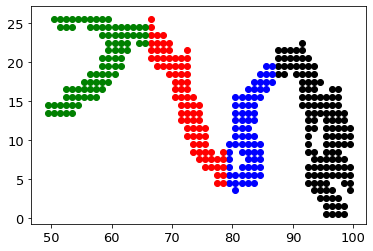

In [72]:
#----------------- Western Arabian Sea ---------------------#

lat_slice_wAS = slice(bounds_wAS[2],bounds_wAS[3]) 
lon_slice_wAS = slice(bounds_wAS[0],bounds_wAS[1]) 

#subset gridded data
temp_wAS = ds_WOA.temp_50_200.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
doxy_wAS = ds_WOA.doxy_50_200.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
sal_wAS = ds_WOA.psal_50_200.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)
sla_wAS = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_wAS, lon = lon_slice_wAS)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_wAS.lon),np.array(temp_wAS.lat))
xx_wAS = xx.flatten()
yy_wAS = yy.flatten()

mask_wAS = mask_coast(xx_wAS,yy_wAS,np.array(ds_WOA.coastal_mask_bounds))
temp_wAS = temp_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
doxy_wAS = doxy_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
sal_wAS = sal_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
sla_wAS = sla_wAS.stack(allpoints=['lat','lon'])[:,mask_wAS]
xx_wAS = xx_wAS[mask_wAS]
yy_wAS = yy_wAS[mask_wAS]
    
temp_wAS = np.array(temp_wAS).flatten()
doxy_wAS = np.array(doxy_wAS).flatten()
sal_wAS = np.array(sal_wAS).flatten()
sla_wAS = np.array(sla_wAS).flatten()

sla_wAS = sla_wAS[~np.isnan(temp_wAS)]
doxy_wAS = doxy_wAS[~np.isnan(temp_wAS)]
sal_wAS = sal_wAS[~np.isnan(temp_wAS)]
temp_wAS = temp_wAS[~np.isnan(temp_wAS)]


#----------------- Arabian Sea ---------------------#

lat_slice_AS = slice(bounds_AS[2],bounds_AS[3]) 
lon_slice_AS = slice(bounds_AS[0],bounds_AS[1]) 

#subset gridded data
temp_AS = ds_WOA.temp_50_200.sel(lat = lat_slice_AS, lon = lon_slice_AS)
doxy_AS = ds_WOA.doxy_50_200.sel(lat = lat_slice_AS, lon = lon_slice_AS)
sal_AS = ds_WOA.psal_50_200.sel(lat = lat_slice_AS, lon = lon_slice_AS)
sla_AS = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_AS, lon = lon_slice_AS)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_AS.lon),np.array(temp_AS.lat))
xx_AS = xx.flatten()
yy_AS = yy.flatten()

mask_AS = mask_coast(xx_AS,yy_AS,np.array(ds_WOA.coastal_mask_bounds))
temp_AS = temp_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
doxy_AS = doxy_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
sal_AS = sal_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
sla_AS = sla_AS.stack(allpoints=['lat','lon'])[:,mask_AS]
xx_AS = xx_AS[mask_AS]
yy_AS = yy_AS[mask_AS]
    
temp_AS = np.array(temp_AS).flatten()
doxy_AS = np.array(doxy_AS).flatten()
sal_AS = np.array(sal_AS).flatten()
sla_AS = np.array(sla_AS).flatten()

sla_AS = sla_AS[~np.isnan(temp_AS)]
doxy_AS = doxy_AS[~np.isnan(temp_AS)]
sal_AS = sal_AS[~np.isnan(temp_AS)]
temp_AS = temp_AS[~np.isnan(temp_AS)]

#---------------- Western Bay of Bengal --------------------#

lat_slice_wBoB = slice(bounds_wBoB[2],bounds_wBoB[3])
lon_slice_wBoB = slice(bounds_wBoB[0],bounds_wBoB[1])

#subset gridded data
temp_wBoB = ds_WOA.temp_50_200.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
doxy_wBoB = ds_WOA.doxy_50_200.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
sal_wBoB = ds_WOA.psal_50_200.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)
sla_wBoB = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_wBoB, lon = lon_slice_wBoB)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_wBoB.lon),np.array(temp_wBoB.lat))
xx_wBoB = xx.flatten()
yy_wBoB = yy.flatten()

mask_wBoB = mask_coast(xx_wBoB,yy_wBoB,np.array(ds_WOA.coastal_mask_bounds))
temp_wBoB = temp_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
doxy_wBoB = doxy_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
sal_wBoB = sal_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
sla_wBoB = sla_wBoB.stack(allpoints=['lat','lon'])[:,mask_wBoB]
xx_wBoB = xx_wBoB[mask_wBoB]
yy_wBoB = yy_wBoB[mask_wBoB]
    
temp_wBoB = np.array(temp_wBoB).flatten()
doxy_wBoB = np.array(doxy_wBoB).flatten()
sal_wBoB = np.array(sal_wBoB).flatten()
sla_wBoB = np.array(sla_wBoB).flatten()

sla_wBoB = sla_wBoB[~np.isnan(temp_wBoB)]
doxy_wBoB = doxy_wBoB[~np.isnan(temp_wBoB)]
sal_wBoB = sal_wBoB[~np.isnan(temp_wBoB)]
temp_wBoB = temp_wBoB[~np.isnan(temp_wBoB)]


#---------------- Bay of Bengal --------------------#

lat_slice_BoB = slice(bounds_BoB[2],bounds_BoB[3])
lon_slice_BoB = slice(bounds_BoB[0],bounds_BoB[1])

#subset gridded data
temp_BoB = ds_WOA.temp_50_200.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
doxy_BoB = ds_WOA.doxy_50_200.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
sal_BoB = ds_WOA.psal_50_200.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)
sla_BoB = ds_SLA.mon_sla_mon_clim.sel(lat = lat_slice_BoB, lon = lon_slice_BoB)

# convert to coastal
xx,yy = np.meshgrid(np.array(temp_BoB.lon),np.array(temp_BoB.lat))
xx_BoB = xx.flatten()
yy_BoB = yy.flatten()

mask_BoB = mask_coast(xx_BoB,yy_BoB,np.array(ds_WOA.coastal_mask_bounds))
temp_BoB = temp_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
doxy_BoB = doxy_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
sal_BoB = sal_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
sla_BoB = sla_BoB.stack(allpoints=['lat','lon'])[:,mask_BoB]
xx_BoB = xx_BoB[mask_BoB]
yy_BoB = yy_BoB[mask_BoB]
        
temp_BoB = np.array(temp_BoB).flatten()
doxy_BoB = np.array(doxy_BoB).flatten()
sal_BoB = np.array(sal_BoB).flatten()
sla_BoB = np.array(sla_BoB).flatten()

sla_BoB = sla_BoB[~np.isnan(temp_BoB)]
doxy_BoB = doxy_BoB[~np.isnan(temp_BoB)]
sal_BoB = sal_BoB[~np.isnan(temp_BoB)]
temp_BoB = temp_BoB[~np.isnan(temp_BoB)]

plt.scatter(xx_BoB,yy_BoB,color = 'k')
plt.scatter(xx_wBoB,yy_wBoB,color = 'b')
plt.scatter(xx_AS,yy_AS,color = 'r')
plt.scatter(xx_wAS,yy_wAS,color = 'g')

# Interannual

Length AS:  6961
Length wBoB:  7449
Length BoB:  8173


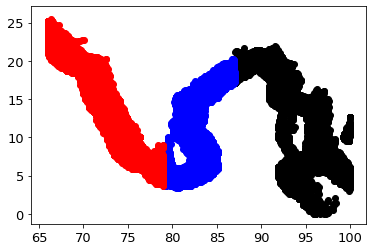

In [73]:
#----------------- Arabian Sea ---------------------#

ind_AS_ia = (ds_WOD.lon < bounds_AS[1]) & (ds_WOD.lon > bounds_AS[0]) & (ds_WOD.lat < bounds_AS[3]) & (ds_WOD.lat > bounds_AS[2]) 

#subset gridded data
temp_AS_ia = np.array(ds_WOD.temp_50_200[ind_AS_ia])
doxy_AS_ia = np.array(ds_WOD.doxy_50_200[ind_AS_ia])
sal_AS_ia = np.array(ds_WOD.sal_50_200[ind_AS_ia])
# nitrate_AS = np.array(ds_WOD.nitrate_50_200[ind_AS_ia])
sla_AS_ia = np.array(ds_SLA_ia.daily_sla[ind_AS_ia])
lat_AS_ia = np.array(ds_WOD.lat[ind_AS_ia])
lon_AS_ia = np.array(ds_WOD.lon[ind_AS_ia])
    
# convert to coastal
mask_AS_ia = mask_coast(lon_AS_ia,lat_AS_ia,np.array(ds_WOD.coastal_mask_bounds))
lat_AS_ia = lat_AS_ia[mask_AS_ia]
lon_AS_ia = lon_AS_ia[mask_AS_ia]
temp_AS_ia = temp_AS_ia[mask_AS_ia]
doxy_AS_ia = doxy_AS_ia[mask_AS_ia]
sal_AS_ia = sal_AS_ia[mask_AS_ia]
# nitrate_AS_ia = nitrate_AS[mask_AS_ia]
sla_AS_ia = sla_AS_ia[mask_AS_ia]

ind = np.isnan(sla_AS_ia) | np.isnan(temp_AS_ia)

print('Length AS: ', len(temp_AS_ia[~ind]))

#---------------- Western Bay of Bengal --------------------#

ind_wBoB_ia = (ds_WOD.lon < bounds_wBoB[1]) & (ds_WOD.lon > bounds_wBoB[0]) & (ds_WOD.lat < bounds_wBoB[3]) & (ds_WOD.lat > bounds_wBoB[2]) 

#subset gridded data
temp_wBoB_ia = np.array(ds_WOD.temp_50_200[ind_wBoB_ia])
doxy_wBoB_ia = np.array(ds_WOD.doxy_50_200[ind_wBoB_ia])
sal_wBoB_ia = np.array(ds_WOD.sal_50_200[ind_wBoB_ia])
# nitrate_wBoB_ia = np.array(ds_WOD.nitrate_50_200[ind_wBoB_ia])
sla_wBoB_ia = np.array(ds_SLA_ia.daily_sla[ind_wBoB_ia])
lat_wBoB_ia = np.array(ds_WOD.lat[ind_wBoB_ia])
lon_wBoB_ia = np.array(ds_WOD.lon[ind_wBoB_ia])
    
# convert to coastal
mask_wBoB_ia = mask_coast(lon_wBoB_ia,lat_wBoB_ia,np.array(ds_WOD.coastal_mask_bounds))
lon_wBoB_ia = lon_wBoB_ia[mask_wBoB_ia]
lat_wBoB_ia = lat_wBoB_ia[mask_wBoB_ia]
temp_wBoB_ia = temp_wBoB_ia[mask_wBoB_ia]
doxy_wBoB_ia = doxy_wBoB_ia[mask_wBoB_ia]
sal_wBoB_ia = sal_wBoB_ia[mask_wBoB_ia]
# nitrate_wBoB_ia = nitrate_wBoB_ia[mask_wBoB_ia]
sla_wBoB_ia = sla_wBoB_ia[mask_wBoB_ia]

ind = np.isnan(sla_wBoB_ia) | np.isnan(temp_wBoB_ia)

print('Length wBoB: ', len(temp_wBoB_ia[~ind]))

#---------------- Bay of Bengal --------------------#

ind_BoB_ia = (ds_WOD.lon < bounds_BoB[1]) & (ds_WOD.lon > bounds_BoB[0]) & (ds_WOD.lat < bounds_BoB[3]) & (ds_WOD.lat > bounds_BoB[2]) 

#subset gridded data
temp_BoB_ia = np.array(ds_WOD.temp_50_200[ind_BoB_ia])
doxy_BoB_ia = np.array(ds_WOD.doxy_50_200[ind_BoB_ia])
sal_BoB_ia = np.array(ds_WOD.sal_50_200[ind_BoB_ia])
# nitrate_BoB_ia = np.array(ds_WOD.nitrate_50_200[ind_BoB_ia])
sla_BoB_ia = np.array(ds_SLA_ia.daily_sla[ind_BoB_ia])
lat_BoB_ia = np.array(ds_WOD.lat[ind_BoB_ia])
lon_BoB_ia = np.array(ds_WOD.lon[ind_BoB_ia])

# convert to coastal
mask_BoB_ia = mask_coast(lon_BoB_ia,lat_BoB_ia,np.array(ds_WOD.coastal_mask_bounds))
lon_BoB_ia = lon_BoB_ia[mask_BoB_ia]
lat_BoB_ia = lat_BoB_ia[mask_BoB_ia]
temp_BoB_ia = temp_BoB_ia[mask_BoB_ia]
doxy_BoB_ia = doxy_BoB_ia[mask_BoB_ia]
sal_BoB_ia = sal_BoB_ia[mask_BoB_ia]
# nitrate_BoB_ia = nitrate_BoB_ia[mask_BoB_ia]
sla_BoB_ia = sla_BoB_ia[mask_BoB_ia]

ind = np.isnan(sla_BoB_ia) | np.isnan(temp_BoB_ia)

print('Length BoB: ', len(temp_BoB_ia[~ind]))

plt.scatter(lon_BoB_ia,lat_BoB_ia,color = 'k')
plt.scatter(lon_wBoB_ia,lat_wBoB_ia,color = 'b')
plt.scatter(lon_AS_ia,lat_AS_ia,color = 'r')

# Find Solubility

In [74]:
#seasonal 
O2_sat_AS = o2sat(temp_AS,sal_AS)
O2_sat_wBoB = o2sat(temp_wBoB,sal_wBoB)
O2_sat_BoB = o2sat(temp_BoB,sal_BoB)

O2_per_sat_AS = doxy_AS/O2_sat_AS*100
O2_per_sat_wBoB = doxy_wBoB/O2_sat_wBoB*100
O2_per_sat_BoB = doxy_BoB/O2_sat_BoB*100

O2_anom_AS = O2_sat_AS
O2_anom_wBoB = doxy_wBoB - O2_sat_wBoB
O2_anom_BoB = doxy_BoB - O2_sat_BoB


#interannual
O2_sat_AS_ia = o2sat(temp_AS_ia,sal_AS_ia)
O2_sat_wBoB_ia = o2sat(temp_wBoB_ia,sal_wBoB_ia)
O2_sat_BoB_ia = o2sat(temp_BoB_ia,sal_BoB_ia)

O2_per_sat_AS_ia = doxy_AS_ia/O2_sat_AS_ia*100
O2_per_sat_wBoB_ia = doxy_wBoB_ia/O2_sat_wBoB_ia*100
O2_per_sat_BoB_ia = doxy_BoB_ia/O2_sat_BoB_ia*100

O2_anom_AS_ia = O2_sat_AS_ia
O2_anom_wBoB_ia = doxy_wBoB_ia - O2_sat_wBoB_ia
O2_anom_BoB_ia = doxy_BoB_ia - O2_sat_BoB_ia

# Plot

5.33522537986151e-88 0.6034162813727699
5.335225379860729e-88 0.6034162813727699
1.3353375383678708e-33 0.4390572589534353
1.3353375383686824e-33 0.4390572589534348
9.464442066690708e-25 0.29180631168575216
9.464442066691935e-25 0.291806311685752
4.836326945403254e-36 0.46102773190238533
4.836326945403649e-36 0.4610277319023849
4.149584788768791e-73 0.7211683039618123
4.1495847887694645e-73 0.7211683039618124
6.65803393335443e-23 0.5217496101662396
6.658033933353667e-23 0.5217496101662394


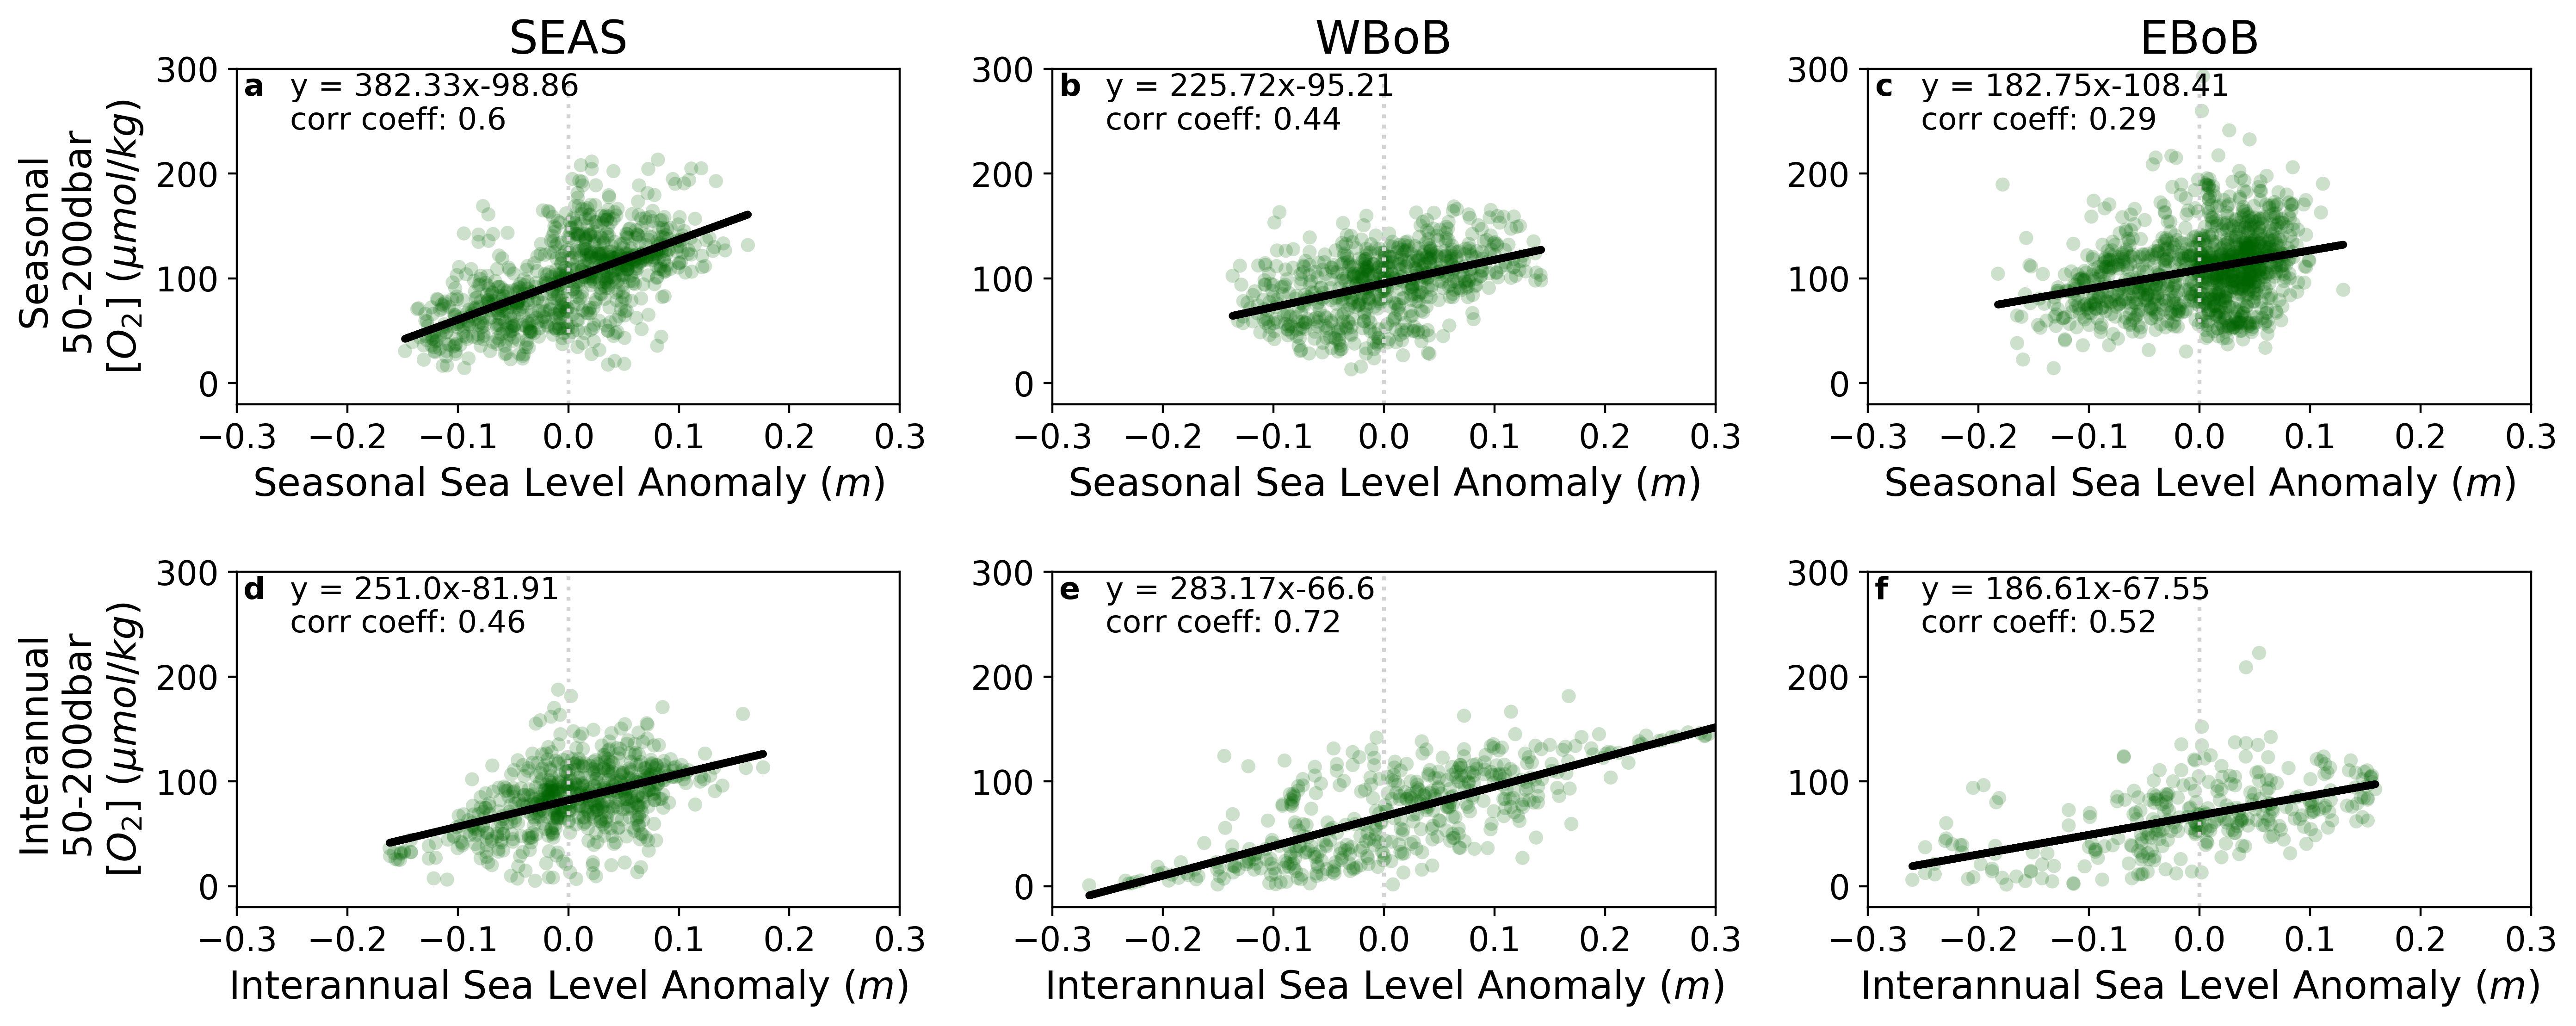

In [75]:
fig = plt.figure(figsize=(16,6),dpi=400)

sz = 30
fsz = 12
alpha = 0.2


xlim = [-0.3,0.3]
ylim = [-20,300]

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
cmap = plt.cm.viridis

sp_clr = 'darkgreen'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 14,
         'axes.labelsize': 15,
         'axes.titlesize': 18,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(231)
ind = np.isnan(sla_AS) | np.isnan(doxy_AS)
p = ax.scatter(sla_AS[~ind],doxy_AS[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_AS[~ind],doxy_AS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_AS[~ind],doxy_AS[~ind])
print(p_val,r)
ax.plot(sla_AS[~ind], m*sla_AS[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('SEAS')
ax.set_ylabel('Seasonal \n50-200dbar \n[$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('Seasonal Sea Level Anomaly ($m$)')
add_letter(ax, 'a', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)


ax = fig.add_subplot(232)
ind = np.isnan(sla_wBoB) | np.isnan(doxy_wBoB)
p = ax.scatter(sla_wBoB[~ind],doxy_wBoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB[~ind],doxy_wBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB[~ind],doxy_wBoB[~ind])
print(p_val,r)
ax.plot(sla_wBoB[~ind], m*sla_wBoB[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('WBoB')
ax.set_xlabel('Seasonal Sea Level Anomaly ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'b', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)


ax = fig.add_subplot(233)
ind = np.isnan(sla_BoB) | np.isnan(doxy_BoB)
p = ax.scatter(sla_BoB[~ind],doxy_BoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB[~ind],doxy_BoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_BoB[~ind],doxy_BoB[~ind])
print(p_val,r)
ax.plot(sla_BoB[~ind], m*sla_BoB[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('EBoB')
ax.set_xlabel('Seasonal Sea Level Anomaly ($m$)')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)

#-------------------------------------------------------------

ax = fig.add_subplot(234)
ind = np.isnan(sla_AS_ia) | np.isnan(doxy_AS_ia)
ax.scatter(sla_AS_ia[~ind],doxy_AS_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_AS_ia[~ind], doxy_AS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_AS_ia[~ind],doxy_AS_ia[~ind])
print(p_val,r)
ax.plot(sla_AS_ia[~ind], m*sla_AS_ia[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('Interannual \n50-200dbar \n[$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('Interannual Sea Level Anomaly ($m$)')
add_letter(ax, 'd', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)


ax = fig.add_subplot(235)
ind = np.isnan(sla_wBoB_ia) | np.isnan(doxy_wBoB_ia)
ax.scatter(sla_wBoB_ia[~ind],doxy_wBoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB_ia[~ind], doxy_wBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB_ia[~ind],doxy_wBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_wBoB_ia[~ind], m*sla_wBoB_ia[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Interannual Sea Level Anomaly ($m$)')
add_letter(ax, 'e', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)

ax = fig.add_subplot(236)
ind = np.isnan(sla_BoB_ia) | np.isnan(doxy_BoB_ia)
ax.scatter(sla_BoB_ia[~ind],doxy_BoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB_ia[~ind], doxy_BoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_BoB_ia[~ind],doxy_BoB_ia[~ind])
print(p_val,r)
ax.plot(sla_BoB_ia[~ind], m*sla_BoB_ia[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Interannual Sea Level Anomaly ($m$)')
add_letter(ax, 'f', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)

plt.subplots_adjust(hspace = 0.5, wspace = 0.23)


# Temperature vs SLA

6.452864617581599e-174 0.7716270188150803
6.452864617578984e-174 0.7716270188150806
2.7057734019066124e-99 0.6937506954481018
2.705773401908196e-99 0.6937506954481015
2.731395499648047e-57 0.43953128795179375
2.731395499647692e-57 0.43953128795179397
0.0 0.5233961168761823
0.0 0.5233961168761823
0.0 0.5575672317142036
0.0 0.5575672317142035
0.0 0.4178779828194641
0.0 0.417877982819464


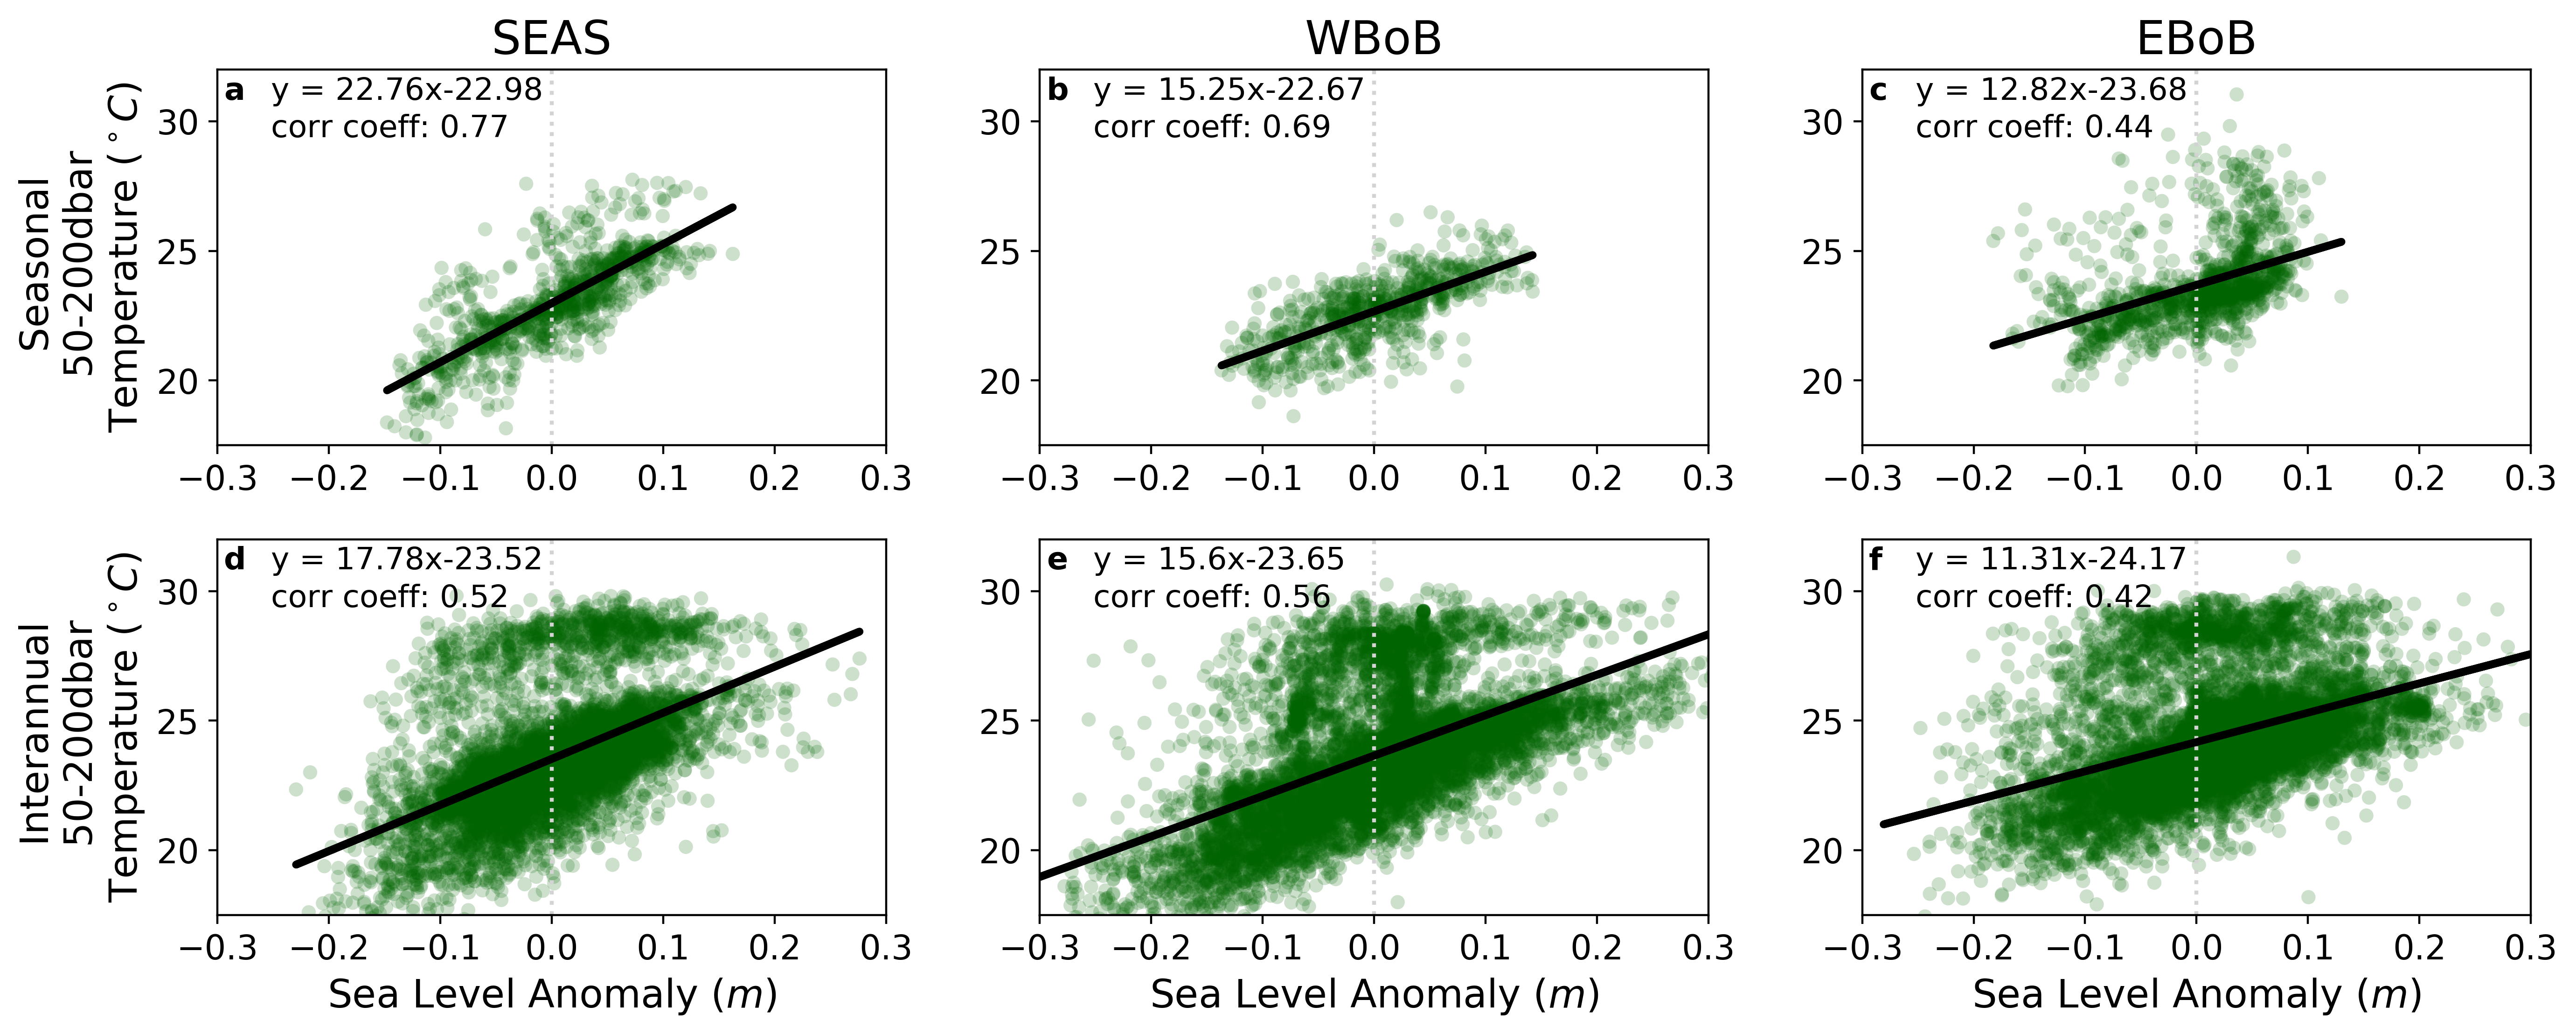

In [76]:
fig = plt.figure(figsize=(16,6),dpi=400)

sz = 30
fsz = 12
alpha = 0.2


xlim = [-0.3,0.3]
ylim = [17.5,32]

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
cmap = plt.cm.viridis

sp_clr = 'darkgreen'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 14,
         'axes.labelsize': 15,
         'axes.titlesize': 18,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(231)
ind = np.isnan(sla_AS) | np.isnan(temp_AS)
p = ax.scatter(sla_AS[~ind],temp_AS[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_AS[~ind],temp_AS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_AS[~ind],temp_AS[~ind])
print(p_val,r)
ax.plot(sla_AS[~ind], m*sla_AS[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('SEAS')
ax.set_ylabel('Seasonal \n50-200dbar \nTemperature ($^\circ C$)')
add_letter(ax, 'a', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)


ax = fig.add_subplot(232)
ind = np.isnan(sla_wBoB) | np.isnan(temp_wBoB)
p = ax.scatter(sla_wBoB[~ind],temp_wBoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB[~ind],temp_wBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB[~ind],temp_wBoB[~ind])
print(p_val,r)
ax.plot(sla_wBoB[~ind], m*sla_wBoB[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('WBoB')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'b', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)


ax = fig.add_subplot(233)
ind = np.isnan(sla_BoB) | np.isnan(temp_BoB)
p = ax.scatter(sla_BoB[~ind],temp_BoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB[~ind],temp_BoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_BoB[~ind],temp_BoB[~ind])
print(p_val,r)
ax.plot(sla_BoB[~ind], m*sla_BoB[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('EBoB')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)

#-------------------------------------------------------------

ax = fig.add_subplot(234)
ind = np.isnan(sla_AS_ia) | np.isnan(temp_AS_ia)
ax.scatter(sla_AS_ia[~ind],temp_AS_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_AS_ia[~ind], temp_AS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_AS_ia[~ind],temp_AS_ia[~ind])
print(p_val,r)
ax.plot(sla_AS_ia[~ind], m*sla_AS_ia[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('Interannual \n50-200dbar \nTemperature ($^\circ C$)')
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'd', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)


ax = fig.add_subplot(235)
ind = np.isnan(sla_wBoB_ia) | np.isnan(temp_wBoB_ia)
ax.scatter(sla_wBoB_ia[~ind],temp_wBoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB_ia[~ind], temp_wBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_wBoB_ia[~ind],temp_wBoB_ia[~ind])
print(p_val,r)
ax.plot(sla_wBoB_ia[~ind], m*sla_wBoB_ia[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'e', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)

ax = fig.add_subplot(236)
ind = np.isnan(sla_BoB_ia) | np.isnan(temp_BoB_ia)
ax.scatter(sla_BoB_ia[~ind],temp_BoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB_ia[~ind], temp_BoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(sla_BoB_ia[~ind],temp_BoB_ia[~ind])
print(p_val,r)
ax.plot(sla_BoB_ia[~ind], m*sla_BoB_ia[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'f', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)

plt.subplots_adjust(hspace = 0.25, wspace = 0.23)



# Temperature vs Doxy

8.439722778565004e-191 0.7936135830508423
8.439722778559837e-191 0.7936135830508425
2.0798402150491024e-47 0.5140964324115718
2.079840215050095e-47 0.5140964324115714
3.514733138105577e-111 0.5875407529943816
3.514733138105459e-111 0.5875407529943817
6.456389192159907e-220 0.7395739233638823
6.456389192168574e-220 0.7395739233638822
1.57365461857086e-152 0.830802789487796
1.5736546185708208e-152 0.8308027894877956
6.209556951908724e-123 0.6898748148148971
6.209556951906569e-123 0.6898748148148973


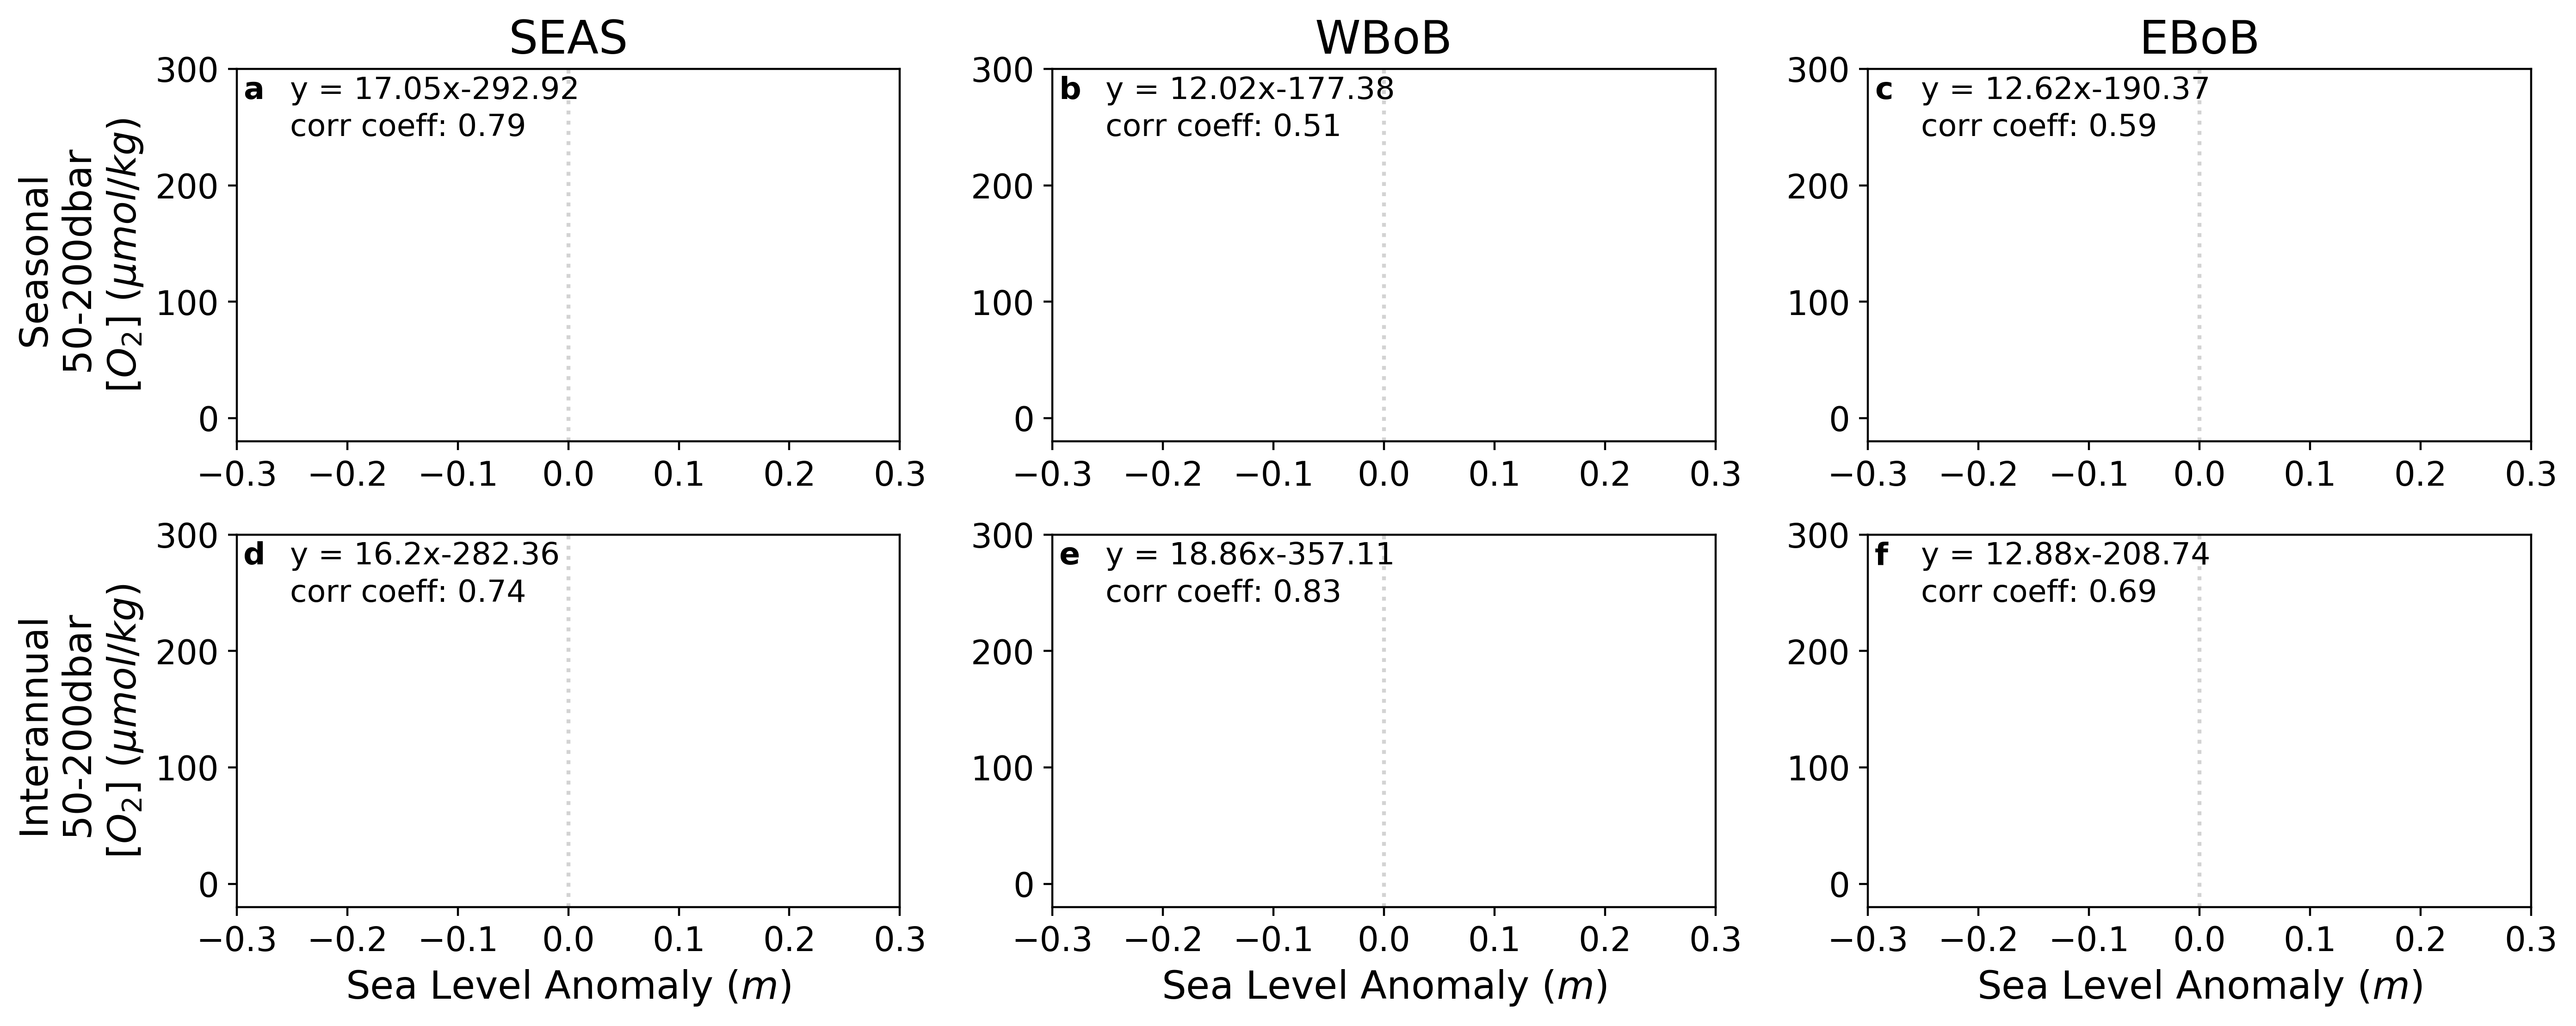

In [77]:
fig = plt.figure(figsize=(16,6),dpi=400)

sz = 30
fsz = 12
alpha = 0.2


xlim = [-0.3,0.3]
ylim = [-20,300]

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
cmap = plt.cm.viridis

sp_clr = 'darkgreen'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 14,
         'axes.labelsize': 15,
         'axes.titlesize': 18,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)

##############################################################

ax = fig.add_subplot(231)
ind = np.isnan(temp_AS) | np.isnan(doxy_AS)
p = ax.scatter(temp_AS[~ind],doxy_AS[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(temp_AS[~ind],doxy_AS[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_AS[~ind],doxy_AS[~ind])
print(p_val,r)
ax.plot(temp_AS[~ind], m*temp_AS[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('SEAS')
ax.set_ylabel('Seasonal \n50-200dbar \n[$O_2$] ($\mu mol/ kg$)')
add_letter(ax, 'a', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)


ax = fig.add_subplot(232)
ind = np.isnan(temp_wBoB) | np.isnan(doxy_wBoB)
p = ax.scatter(temp_wBoB[~ind],doxy_wBoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_wBoB[~ind],doxy_wBoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_wBoB[~ind],doxy_wBoB[~ind])
print(p_val,r)
ax.plot(temp_wBoB[~ind], m*temp_wBoB[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('WBoB')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'b', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)


ax = fig.add_subplot(233)
ind = np.isnan(temp_BoB) | np.isnan(doxy_BoB)
p = ax.scatter(temp_BoB[~ind],doxy_BoB[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_BoB[~ind],doxy_BoB[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_BoB[~ind],doxy_BoB[~ind])
print(p_val,r)
ax.plot(temp_BoB[~ind], m*temp_BoB[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('EBoB')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)

#-------------------------------------------------------------

ax = fig.add_subplot(234)
ind = np.isnan(temp_AS_ia) | np.isnan(doxy_AS_ia)
ax.scatter(temp_AS_ia[~ind],doxy_AS_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_AS_ia[~ind], doxy_AS_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_AS_ia[~ind],doxy_AS_ia[~ind])
print(p_val,r)
ax.plot(temp_AS_ia[~ind], m*temp_AS_ia[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('Interannual \n50-200dbar \n[$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'd', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)


ax = fig.add_subplot(235)
ind = np.isnan(temp_wBoB_ia) | np.isnan(doxy_wBoB_ia)
ax.scatter(temp_wBoB_ia[~ind],doxy_wBoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_wBoB_ia[~ind], doxy_wBoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_wBoB_ia[~ind],doxy_wBoB_ia[~ind])
print(p_val,r)
ax.plot(temp_wBoB_ia[~ind], m*temp_wBoB_ia[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'e', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)

ax = fig.add_subplot(236)
ind = np.isnan(temp_BoB_ia) | np.isnan(doxy_BoB_ia)
ax.scatter(temp_BoB_ia[~ind],doxy_BoB_ia[~ind],c = sp_clr,s= sz,alpha = alpha, edgecolor = 'none')
ax.axvline(x=0,color = 'lightgray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(temp_BoB_ia[~ind], doxy_BoB_ia[~ind])
print(p_val,r)
r,p_val = stats.pearsonr(temp_BoB_ia[~ind],doxy_BoB_ia[~ind])
print(p_val,r)
ax.plot(temp_BoB_ia[~ind], m*temp_BoB_ia[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'f', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.08,y=0.92, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.08,y=0.82, fontsize = fsz)
# add_text(ax, 'p-value: ' + str(p_val), x = 0.08,y=0.72, fontsize = fsz)

plt.subplots_adjust(hspace = 0.25, wspace = 0.23)



# Redo for 40-200


# Redo for 50-225

# Spatial Map of Points Used for Correlations

NameError: name 'lon_AS' is not defined

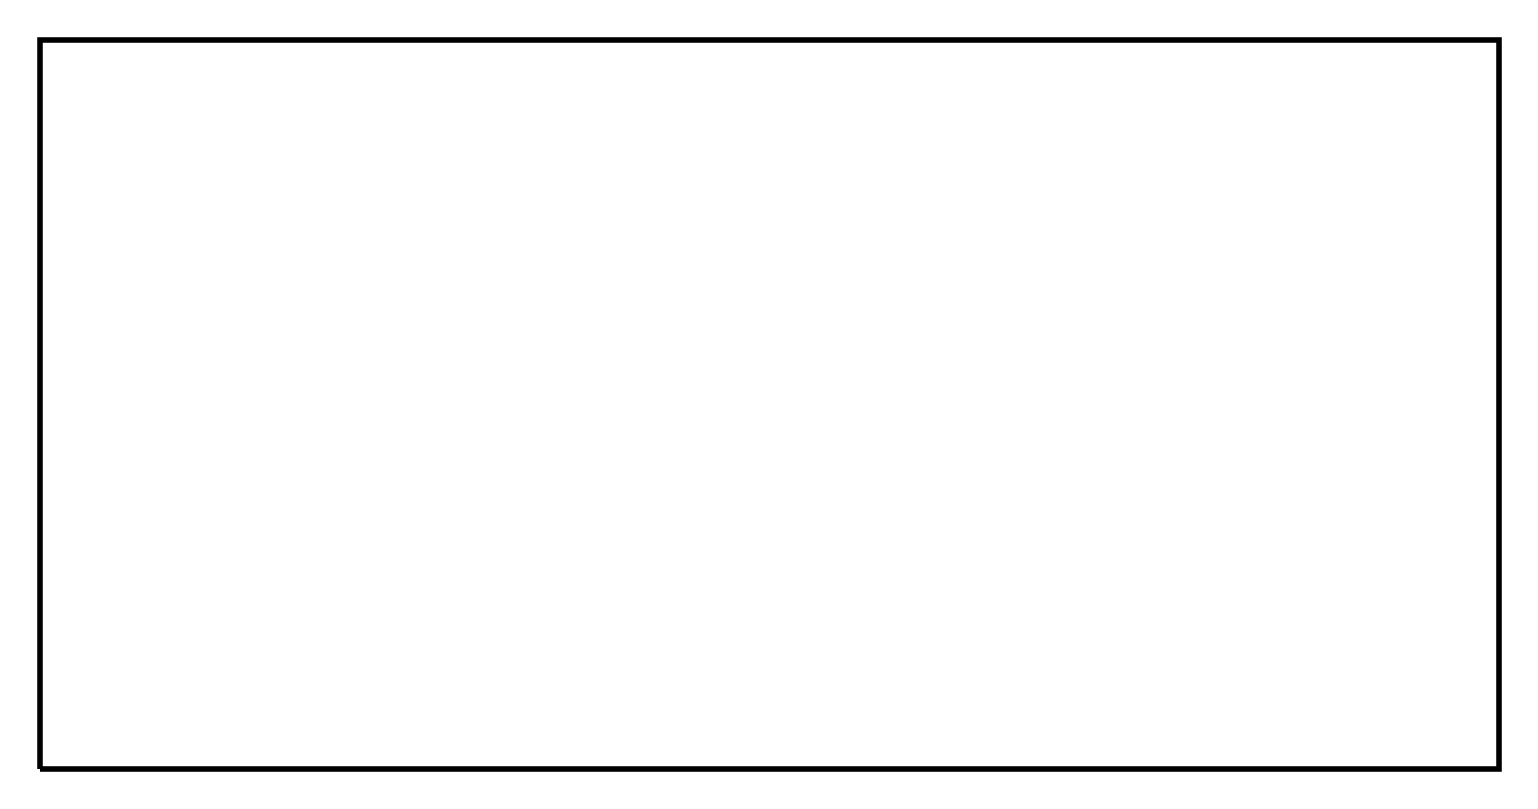

In [78]:
fig = plt.figure(figsize=(16,4),dpi=400)

sz = 1
sq_sz = 60
fsz = 12
alpha = 0.25


sp_clr = 'purple'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 14,
         'axes.labelsize': 15,
         'axes.titlesize': 18,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)

##############################################################

xlim = [-0.4,0.6]
ylim = [16,32]

ax = fig.add_subplot(131,projection= ccrs.PlateCarree())
ind = np.isnan(sla_AS) | np.isnan(temp_AS)
p = ax.scatter(lon_AS[~ind],lat_AS[~ind], c='k', s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_wBoB) | np.isnan(temp_wBoB)
p = ax.scatter(lon_wBoB[~ind],lat_wBoB[~ind], c='g', s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_BoB) | np.isnan(temp_BoB)
p = ax.scatter(lon_BoB[~ind],lat_BoB[~ind], c='b', s = sz,transform=ccrs.PlateCarree())
ax.set_title('Temperature & SLA Obs')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'a', x = 0.01,y=0.94)
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'SEAS', x = 0.45,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = 8, color = 'w')

ax = fig.add_subplot(132,projection= ccrs.PlateCarree())
ind = np.isnan(sla_AS) | np.isnan(doxy_AS)
p = ax.scatter(lon_AS[~ind],lat_AS[~ind], c='k', s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_wBoB) | np.isnan(doxy_wBoB)
p = ax.scatter(lon_wBoB[~ind],lat_wBoB[~ind], c='g', s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(sla_BoB) | np.isnan(doxy_BoB)
p = ax.scatter(lon_BoB[~ind],lat_BoB[~ind], c='b', s = sz,transform=ccrs.PlateCarree())
ax.set_title('Oxygen & SLA Obs')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'b', x = 0.01,y=0.94)
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'SEAS', x = 0.45,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = 8, color = 'w')

ax = fig.add_subplot(133,projection= ccrs.PlateCarree())
ind = np.isnan(doxy_AS) | np.isnan(temp_AS)
p = ax.scatter(lon_AS[~ind],lat_AS[~ind], c='k', s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(doxy_wBoB) | np.isnan(temp_wBoB)
p = ax.scatter(lon_wBoB[~ind],lat_wBoB[~ind], c='g', s = sz,transform=ccrs.PlateCarree())
ind = np.isnan(doxy_BoB) | np.isnan(temp_BoB)
p = ax.scatter(lon_BoB[~ind],lat_BoB[~ind], c='b', s = sz,transform=ccrs.PlateCarree())
ax.set_title('Temperature & Oxygen Obs')
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'c', x = 0.01,y=0.94)
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'SEAS', x = 0.45,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = 8, color = 'w')

plt.subplots_adjust(hspace = 0.25, wspace = 0.23)

# Redo for WOD18

In [ ]:
# WOA
ds_WOD = xr.open_dataset('../data/wod18_processed.nc')
ds_WOD

In [ ]:
# SLA
ds_SLA = xr.open_dataset('../data/sla_to_wod18.nc')
ds_SLA

In [ ]:
#----------------- Arabian Sea ---------------------#

ind_AS = (ds_WOD.lon < bounds_AS[1]) & (ds_WOD.lon > bounds_AS[0]) & (ds_WOD.lat < bounds_AS[3]) & (ds_WOD.lat > bounds_AS[2]) 

#subset gridded data
temp_AS = np.array(ds_WOD.temp_50_200[ind_AS])
doxy_AS = np.array(ds_WOD.doxy_50_200[ind_AS])
sal_AS = np.array(ds_WOD.sal_50_200[ind_AS])
# nitrate_AS = np.array(ds_WOD.nitrate_50_200[ind_AS])
sla_AS = np.array(ds_SLA.daily_sla[ind_AS])
lat_AS = np.array(ds_WOD.lat[ind_AS])
lon_AS = np.array(ds_WOD.lon[ind_AS])
    
# convert to coastal
mask_AS = mask_coast(lon_AS,lat_AS,np.array(ds_WOD.coastal_mask_bounds))
lat_AS = lat_AS[mask_AS]
lon_AS = lon_AS[mask_AS]
temp_AS = temp_AS[mask_AS]
doxy_AS = doxy_AS[mask_AS]
sal_AS = sal_AS[mask_AS]
# nitrate_AS = nitrate_AS[mask_AS]
sla_AS = sla_AS[mask_AS]

ind = np.isnan(sla_AS) | np.isnan(temp_AS)

print('Length AS: ', len(temp_AS[~ind]))

#---------------- Western Bay of Bengal --------------------#

ind_wBoB = (ds_WOD.lon < bounds_wBoB[1]) & (ds_WOD.lon > bounds_wBoB[0]) & (ds_WOD.lat < bounds_wBoB[3]) & (ds_WOD.lat > bounds_wBoB[2]) 

#subset gridded data
temp_wBoB = np.array(ds_WOD.temp_50_200[ind_wBoB])
doxy_wBoB = np.array(ds_WOD.doxy_50_200[ind_wBoB])
sal_wBoB = np.array(ds_WOD.sal_50_200[ind_wBoB])
# nitrate_wBoB = np.array(ds_WOD.nitrate_50_200[ind_wBoB])
sla_wBoB = np.array(ds_SLA.daily_sla[ind_wBoB])
lat_wBoB = np.array(ds_WOD.lat[ind_wBoB])
lon_wBoB = np.array(ds_WOD.lon[ind_wBoB])
    
# convert to coastal
mask_wBoB = mask_coast(lon_wBoB,lat_wBoB,np.array(ds_WOD.coastal_mask_bounds))
lon_wBoB = lon_wBoB[mask_wBoB]
lat_wBoB = lat_wBoB[mask_wBoB]
temp_wBoB = temp_wBoB[mask_wBoB]
doxy_wBoB = doxy_wBoB[mask_wBoB]
sal_wBoB = sal_wBoB[mask_wBoB]
# nitrate_wBoB = nitrate_wBoB[mask_wBoB]
sla_wBoB = sla_wBoB[mask_wBoB]

ind = np.isnan(sla_wBoB) | np.isnan(temp_wBoB)

print('Length wBoB: ', len(temp_wBoB[~ind]))

#---------------- Bay of Bengal --------------------#

ind_BoB = (ds_WOD.lon < bounds_BoB[1]) & (ds_WOD.lon > bounds_BoB[0]) & (ds_WOD.lat < bounds_BoB[3]) & (ds_WOD.lat > bounds_BoB[2]) 

#subset gridded data
temp_BoB = np.array(ds_WOD.temp_50_200[ind_BoB])
doxy_BoB = np.array(ds_WOD.doxy_50_200[ind_BoB])
sal_BoB = np.array(ds_WOD.sal_50_200[ind_BoB])
# nitrate_BoB = np.array(ds_WOD.nitrate_50_200[ind_BoB])
sla_BoB = np.array(ds_SLA.daily_sla[ind_BoB])
lat_BoB = np.array(ds_WOD.lat[ind_BoB])
lon_BoB = np.array(ds_WOD.lon[ind_BoB])

# convert to coastal
mask_BoB = mask_coast(lon_BoB,lat_BoB,np.array(ds_WOD.coastal_mask_bounds))
lon_BoB = lon_BoB[mask_BoB]
lat_BoB = lat_BoB[mask_BoB]
temp_BoB = temp_BoB[mask_BoB]
doxy_BoB = doxy_BoB[mask_BoB]
sal_BoB = sal_BoB[mask_BoB]
# nitrate_BoB = nitrate_BoB[mask_BoB]
sla_BoB = sla_BoB[mask_BoB]

ind = np.isnan(sla_BoB) | np.isnan(temp_BoB)

print('Length BoB: ', len(temp_BoB[~ind]))

In [ ]:
fig = plt.figure(figsize=(16,6),dpi=400)

sz = 12
sq_sz = 60
fsz = 12
alpha = 0.25

cmin = 0
cmax = 1

# cmap = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
cmap = plt.cm.viridis

sp_clr = 'purple'
sat_clr = 'lightgrey'

params = {'legend.fontsize': 14,
         'axes.labelsize': 15,
         'axes.titlesize': 18,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)

##############################################################

xlim = [-0.4,0.6]
ylim = [16,32]

ax = fig.add_subplot(241)
ind = np.isnan(sla_AS) | np.isnan(temp_AS)
p = ax.scatter(sla_AS[~ind],temp_AS[~ind],c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'gray',linestyle = ':')
m, b, r, p_val,_ = stats.linregress(sla_AS[~ind],temp_AS[~ind])
ax.plot(sla_AS[~ind], m*sla_AS[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('SEAS')
ax.set_ylabel('50-200dbar \nTemperature ($^\circ C$)')
add_letter(ax, 'a', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(242)
ind = np.isnan(sla_wBoB) | np.isnan(temp_wBoB)
p = ax.scatter(sla_wBoB[~ind],temp_wBoB[~ind],c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'gray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB[~ind],temp_wBoB[~ind])
ax.plot(sla_wBoB[~ind], m*sla_wBoB[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('WBoB')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'b', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(243)
ind = np.isnan(sla_BoB) | np.isnan(temp_BoB)
p = ax.scatter(sla_BoB[~ind],temp_BoB[~ind],c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'gray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB[~ind],temp_BoB[~ind])
ax.plot(sla_BoB[~ind], m*sla_BoB[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('EBoB')
ax.tick_params(axis='x',labelbottom='off')
ax.tick_params(axis='y',labelbottom='off')
add_letter(ax, 'c', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(244,projection= ccrs.PlateCarree())
var = r_value_sla_temp.flatten()[mask]
rm_mask = var >= 0
p = ax.scatter(xx[rm_mask],yy[rm_mask],c = var[rm_mask],
           marker='s',s= sq_sz,cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'd', x = 0.01,y=0.92)
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'SEAS', x = 0.45,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = 8, color = 'w')

# max and mins 
print('min temp/sla r val: ', np.nanmin(var[rm_mask]))
print('max temp/sla r val: ', np.nanmax(var[rm_mask]))

#-------------------------------------------------------------
xlim = [-0.4,0.6]
ylim = [-20,300]

ax = fig.add_subplot(245)
ind = np.isnan(sla_AS) | np.isnan(doxy_AS)
ax.scatter(sla_AS[~ind],doxy_AS[~ind],c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'gray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_AS[~ind], doxy_AS[~ind])
ax.plot(sla_AS[~ind], m*sla_AS[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel('50-200dbar \n[$O_2$] ($\mu mol/ kg$)')
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'e', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(246)
ind = np.isnan(sla_wBoB) | np.isnan(doxy_wBoB)
ax.scatter(sla_wBoB[~ind],doxy_wBoB[~ind],c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'gray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_wBoB[~ind], doxy_wBoB[~ind])
ax.plot(sla_wBoB[~ind], m*sla_wBoB[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'f', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)


ax = fig.add_subplot(247)
ind = np.isnan(sla_BoB) | np.isnan(doxy_BoB)
ax.scatter(sla_BoB[~ind],doxy_BoB[~ind],c = sp_clr,s= sz,alpha = alpha)
ax.axvline(x=0,color = 'gray',linestyle = ':')
m, b, r, p_val,_ =stats.linregress(sla_BoB[~ind], doxy_BoB[~ind])
ax.plot(sla_BoB[~ind], m*sla_BoB[~ind] + b, 'k', linewidth = 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Sea Level Anomaly ($m$)')
add_letter(ax, 'g', x = 0.01,y=0.92)
add_text(ax, 'y = ' + str(np.round(m,2)) + 'x-' + str(np.round(np.abs(b),2)), x = 0.1,y=0.915, fontsize = fsz)
add_text(ax, 'corr coeff: ' + str(np.round(r,2)), x = 0.5,y=0.095, fontsize = fsz)
add_text(ax, 'p-value: ' + str(np.round(p_val,4)), x = 0.5,y=0.02, fontsize = fsz)

ax = fig.add_subplot(248,projection= ccrs.PlateCarree())
var = r_value_sla_doxy.flatten()[mask]
rm_mask = var >= 0
p = ax.scatter(xx[rm_mask],yy[rm_mask],c = var[rm_mask],
           marker='s',s= sq_sz,cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
g = add_land(ax, countries = True, rivers = True)
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 13}
g.ylabel_style = {'size': 13}
add_letter(ax, 'h', x = 0.01,y=0.92)
box_bounds = [bounds_AS,
         bounds_wBoB,
         bounds_BoB]  #lonmin,lonmax, latmin, latmax 
clrs = ['k','k','k']
add_box(ax,box_bounds,clrs)
add_text(ax, 'SEAS', x = 0.45,y=0.56, fontsize = 8, color = 'w')
add_text(ax, 'WBoB', x = 0.58,y=0.59, fontsize = 8, color = 'w')
add_text(ax, 'EBoB', x = 0.82,y=0.65, fontsize = 8, color = 'w')


# max and mins 
print('min temp/doxy r val: ', np.nanmin(var[rm_mask]))
print('max temp/doxy r val: ', np.nanmax(var[rm_mask]))


plt.subplots_adjust(hspace = 0.25, wspace = 0.23)

add_single_vert_cbar(fig,p,'Interannual Correlation Coefficient')